Nesta seção, mostrarei um projeto de ciência de dados sobre análise de intenção de compras online com Python. Vou começar com esta tarefa importando as bibliotecas necessárias e os dados:

In [ ]:
import numpy as np # algebra Linear
import pandas as pd # processamento de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention (3).csv


In [ ]:
# leia o conjunto de dados
data = pd.read_csv('online_shoppers_intention.csv')

In [ ]:
data.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False


In [ ]:
print(type(data))
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


In [55]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
# data['Revenue_v2'] = data['Revenue'].astype(int)
# data.head()

In [54]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Grafico de Receita de compras

Text(-8.700000000000003, 0.5, 'Quantidade')

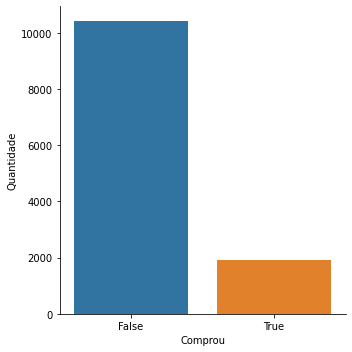

In [56]:
import seaborn as sns
sns.catplot(x='Revenue', kind='count', data=data)
plt.xlabel("Comprou")
plt.ylabel("Quantidade")

Agora vamos dar uma olhada nos valores ausentes e preenchê-los usando o método fillna nos pandas do Python:

In [57]:
missing = data.isnull().sum()
print(missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [58]:
data.fillna(0, inplace = True)

In [59]:
data.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


Agora, dê uma olhada nas taxas de rejeição de clientes relacionadas ao produto:

In [60]:
x = data.iloc[:, [5, 6]].values
x.shape

(12330, 2)

Agora vamos aplicar o método K-elbow para determinar o número de grupos de clustering:

In [61]:
from sklearn.cluster import KMeans

In [62]:
wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i,init = 'k-means++',max_iter = 300,n_init = 10,random_state = 0,algorithm = 'full',tol = 0.001)
  km.fit(x)
  labels = km.labels_
  wcss.append(km.inertia_)

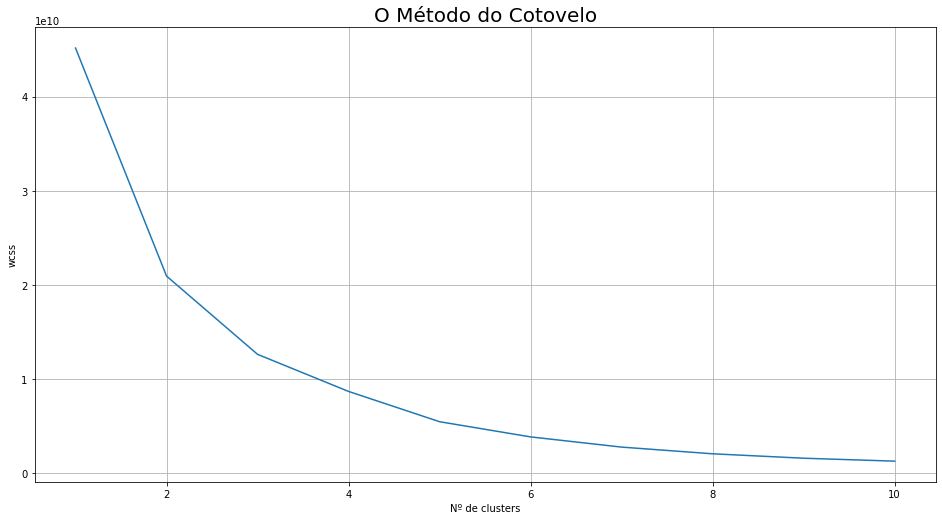

In [63]:
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('O Método do Cotovelo', fontsize = 20)
plt.xlabel('Nº de clusters')
plt.ylabel('wcss')
plt.show()

O **K-Elbow** implementa o método “elbow” para selecionar o número ideal de clusters para clustering K-means. 

# **K-Means Clustering**

**K-means** é um algoritmo simples de aprendizado de máquina **não supervisionado** que agrupa dados em um número especificado (k) de clusters. Como o usuário deve especificar antecipadamente qual k escolher, o algoritmo é um tanto ingênuo – ele atribui todos os membros a k clusters, mesmo que esse não seja o k correto para o conjunto de dados.

O método do **K-elbow** executa o agrupamento k-means no conjunto de dados para um intervalo de valores para k (digamos, de 1 a 10) e, em seguida, para cada valor de k calcula uma pontuação média para todos os agrupamentos.
De acordo com o gráfico acima, a curvatura máxima está no segundo índice, ou seja, o número de agrupamentos ótimos para a duração do produto e as taxas de rejeição são 2. Uma vez determinado o número de agrupamentos, aplicamos o método K Means e plote os clusters:

In [64]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# get predicted cluster index for each sample: 0, 1, 2
y_means = km.fit_predict(x)
print(type(y_means))

<class 'numpy.ndarray'>


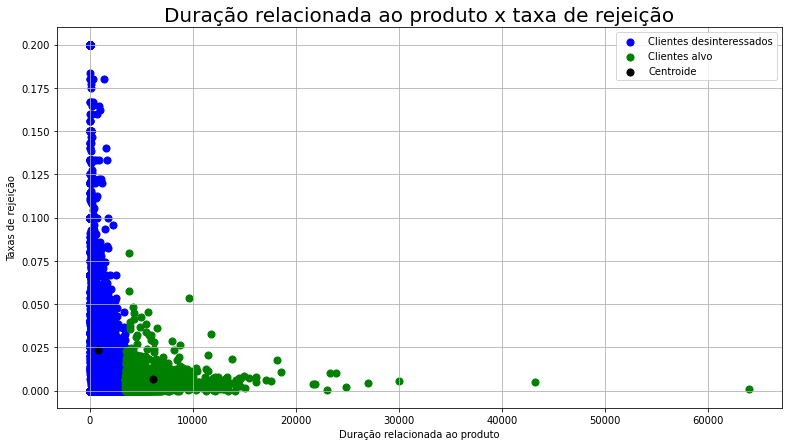

In [65]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'blue', label = 'Clientes desinteressados')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'green', label = 'Clientes alvo')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'black' , label = 'Centroide')

plt.title('Duração relacionada ao produto x taxa de rejeição', fontsize = 20)
plt.grid()
plt.xlabel('Duração relacionada ao produto')
plt.ylabel('Taxas de rejeição')
plt.legend()
plt.show()

Olhando para gráfico de agrupamento **K-Means**, podemos dizer com certeza que os clientes que passaram mais tempo em um site relacionado a produtos têm muito menos probabilidade de sair do site depois de visualizar uma única página.

Como o **K-Means** não é um método de aprendizado supervisionado, estamos adotando outras formas de avaliar seu resultado de agrupamento. A coluna mais à esquerda da matriz de confusão representa o rótulo real (receita verdadeira ou falsa) e a linha superior representa os grupos de agrupamento esperados (clientes desinteressados ou clientes-alvo):

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])

# obter rótulo de resultado de agrupamento previsto
labels_pred = y_means

In [67]:
# imprimir índice rand ajustado, que mede a semelhança das duas atribuições
from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Índice de rand ajustado: ")
print(score)

Índice de rand ajustado: 
0.08359442469281096


In [68]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


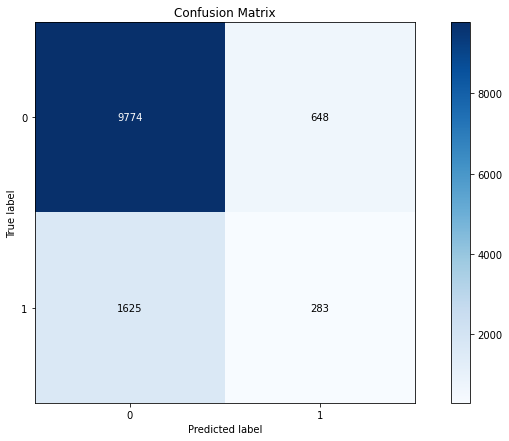

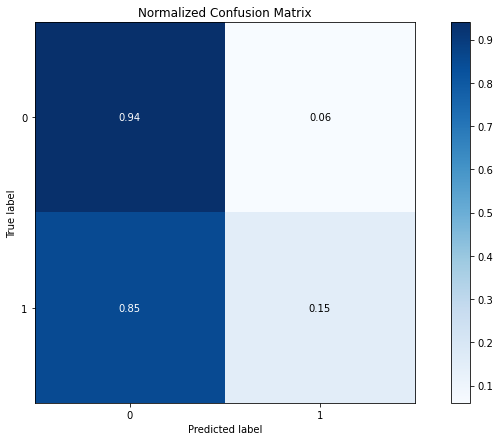

In [69]:
import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

**Observações das parcelas acima:**

A partir da matriz de confusão, podemos ver que das 10.422 receitas com falha, 9.774 estão agrupadas em clientes desinteressados ou 94%. No entanto, das 931 receitas bem-sucedidas, apenas 283 estão agrupadas como clientes-alvo ou 15%.

Portanto, está claro que agrupamos mal muitas sessões de receita bem-sucedidas como clientes desinteressados, o que significa que, quando a alta taxa de rejeição combinada com uma curta duração da página relacionada ao produto, ainda há muitos clientes alvos.